### Imports

In [171]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

### Chargement du dataset

In [172]:
with open('input/metropole-de-lyon_jcd_jcdecaux.jcdvelov.json') as f:
    data = json.load(f)

In [173]:
data.keys()

dict_keys(['type', 'features', 'totalFeatures', 'numberMatched', 'numberReturned', 'timeStamp', 'crs', 'bbox'])

Seules les données dans features nous intéressent.

In [174]:
data_from_dict = [item['properties'] for item in data['features']]
df = pd.json_normalize(data_from_dict)
df.head()

,number,name,address,address2,address_jcd,commune,nmarrond,bonus,pole,bike_stands,...,main_stands.availabilities.mechanicalBikes,main_stands.availabilities.electricalInternalBatteryBikes,main_stands.availabilities.electricalRemovableBatteryBikes,overflow_stands.capacity,overflow_stands.availabilities.bikes,overflow_stands.availabilities.stands,overflow_stands.availabilities.electricalBikes,overflow_stands.availabilities.mechanicalBikes,overflow_stands.availabilities.electricalInternalBatteryBikes,overflow_stands.availabilities.electricalRemovableBatteryBikes
0,2010,2010 - CONFLUENCE / DARSE,Allée Andrée Mure,Angle Quai Antoine Riboud,ANGLE ALLEE ANDRE MURE ET QUAI ANTOINE RIBOUD,Lyon 2e Arrondissement,10.0,False,Pôle de Loisirs Confluence,22,...,3,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5015,5015 - FULCHIRON,"41, Quai Fulchiron",NaN,Devant le n°41 rue de la Quarantaine,Lyon 5e Arrondissement,15.0,False,Maillage,19,...,5,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32001,32001 - COUZON - CENTRE,Quai Jean Lavergne,Face Place de la Libération,NaN,Couzon-au-Mont-d'Or,NaN,False,Centre de Couzon au Mont d'Or,17,...,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6004,6004 - FOCH,"11, Cours Franklin Roosevelt",Angle Rue Vendôme,Angle rue Vendôme,Lyon 6e Arrondissement,4.0,False,Métro A - Coeur quartier,20,...,5,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7035,7035 - MARSEILLE / UNIVERSITÉ,Place Deperet,"Face 8, Rue de l'Université",Angle rue de Marseille,Lyon 7e Arrondissement,35.0,False,Tram T1 - Commerces - Université,40,...,16,0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sélection des colonnes pertinentes

In [175]:
df.shape

(422, 45)

In [176]:
df.columns

Index(['number', 'name', 'address', 'address2', 'address_jcd', 'commune',
       'nmarrond', 'bonus', 'pole', 'bike_stands', 'available_bike_stands',
       'available_bikes', 'availabilitycode', 'availability', 'status',
       'banking', 'lat', 'lng', 'gid', 'last_update', 'last_update_fme',
       'last_update_gl', 'code_insee', 'overflow', 'total_stands.capacity',
       'total_stands.availabilities.bikes',
       'total_stands.availabilities.stands',
       'total_stands.availabilities.electricalBikes',
       'total_stands.availabilities.mechanicalBikes',
       'total_stands.availabilities.electricalInternalBatteryBikes',
       'total_stands.availabilities.electricalRemovableBatteryBikes',
       'main_stands.capacity', 'main_stands.availabilities.bikes',
       'main_stands.availabilities.stands',
       'main_stands.availabilities.electricalBikes',
       'main_stands.availabilities.mechanicalBikes',
       'main_stands.availabilities.electricalInternalBatteryBikes',
       '

Première sélection de colonnes qui nous intéressent

In [177]:
df_selection = df[['gid', 'commune', 'bike_stands', 'status', 'lat', 'lng']]
df_selection.head()

,gid,commune,bike_stands,status,lat,lng
0,1,Lyon 2e Arrondissement,22,OPEN,45.743317,4.815747
1,2,Lyon 5e Arrondissement,19,OPEN,45.751970,4.821662
2,3,Couzon-au-Mont-d'Or,17,OPEN,45.846034,4.832409
3,4,Lyon 6e Arrondissement,20,OPEN,45.768896,4.844845
4,5,Lyon 7e Arrondissement,40,OPEN,45.750945,4.839270


### Filtrage des données (communes et statut)

In [178]:
df_selection = df_selection[df_selection['commune'].isin(['Lyon 2e Arrondissement', 'Lyon 5e Arrondissement',
        'Lyon 6e Arrondissement',
       'Lyon 7e Arrondissement', 'Lyon 9e Arrondissement',
        'Lyon 4e Arrondissement', 
        'Lyon 3e Arrondissement', 'Lyon 8e Arrondissement',
       'Lyon 1er Arrondissement'])]

In [179]:
df_selection = df_selection[df_selection['status']=='OPEN']

In [180]:
df_selection.shape

(293, 6)

In [181]:
df_selection.drop(['status'], axis=1, inplace=True)

In [182]:
df_selection.head()

,gid,commune,bike_stands,lat,lng
0,1,Lyon 2e Arrondissement,22,45.743317,4.815747
1,2,Lyon 5e Arrondissement,19,45.751970,4.821662
3,4,Lyon 6e Arrondissement,20,45.768896,4.844845
4,5,Lyon 7e Arrondissement,40,45.750945,4.839270
6,7,Lyon 5e Arrondissement,13,45.756204,4.802727


In [183]:
df_selection.isna().sum()

gid            0
commune        0
bike_stands    0
lat            0
lng            0
dtype: int64

In [184]:
df_selection.duplicated().sum()

0

In [185]:
df_selection.describe()

,gid,bike_stands,lat,lng
count,293.000000,293.000000,293.000000,293.000000
mean,214.962457,21.412969,45.757506,4.840758
std,126.854147,7.610157,0.015492,0.022497
min,1.000000,10.000000,45.722800,4.783206
25%,105.000000,16.000000,45.746681,4.826720
50%,211.000000,20.000000,45.757571,4.840495
75%,324.000000,25.000000,45.768223,4.856713
max,435.000000,59.000000,45.801192,4.894272


In [186]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gid          293 non-null    int64  
 1   commune      293 non-null    object 
 2   bike_stands  293 non-null    int64  
 3   lat          293 non-null    float64
 4   lng          293 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 13.7+ KB


In [187]:
df_selection.rename(columns={'gid': 'id', 'commune': 'arrondissement'}, inplace=True)

In [188]:
df_selection.columns

Index(['id', 'arrondissement', 'bike_stands', 'lat', 'lng'], dtype='object')

In [189]:
df_selection['arrondissement'] = df_selection['arrondissement'].str.replace('Lyon ', '')

In [190]:
df_selection['coordinates'] = df_selection['lat'].astype(str) + ',' + df_selection['lng'].astype(str)
df_selection.drop(['lat', 'lng'], axis=1, inplace=True)
df_selection.head(2)

,id,arrondissement,bike_stands,coordinates
0,1,2e Arrondissement,22,"45.743317,4.815747"
1,2,5e Arrondissement,19,"45.75197,4.821662"


### Export en csv

In [191]:
df_selection.to_csv('output/bornes_vlov_lyon.csv', index=False, sep=';')

### Premier apperçu de la distribution des données

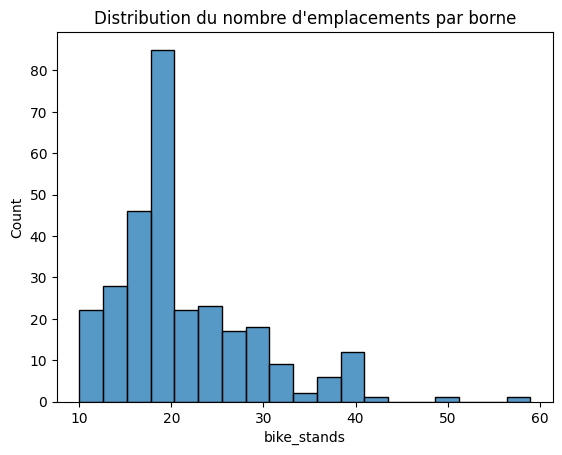

In [192]:
sns.histplot(df_selection['bike_stands'])
plt.title("Distribution du nombre d'emplacements par borne");

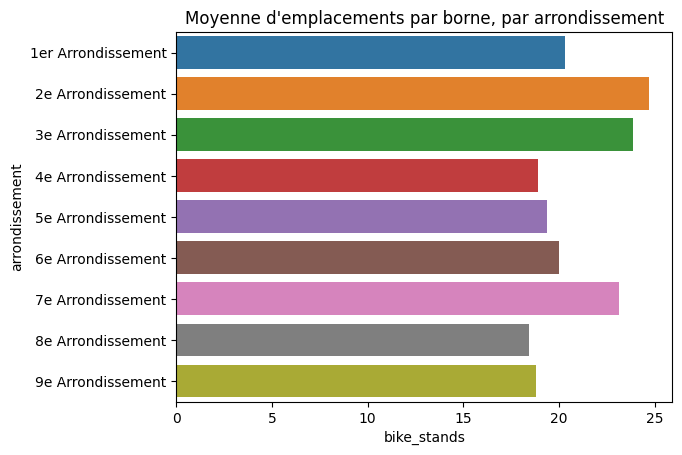

In [193]:
sns.barplot(data=df_selection[['arrondissement', 'bike_stands']].groupby('arrondissement').mean().reset_index(),
             x='bike_stands', y='arrondissement', 
             orient='horizontal', ci=None)
plt.title("Moyenne d'emplacements par borne, par arrondissement");

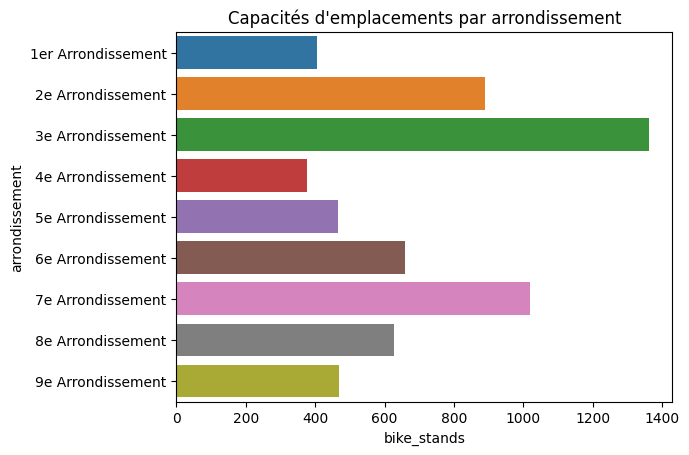

In [194]:
sns.barplot(data=df_selection[['arrondissement', 'bike_stands']].groupby('arrondissement').sum().reset_index(),
             x='bike_stands', y='arrondissement', 
             orient='horizontal', ci=None)
plt.title("Capacités d'emplacements par arrondissement");

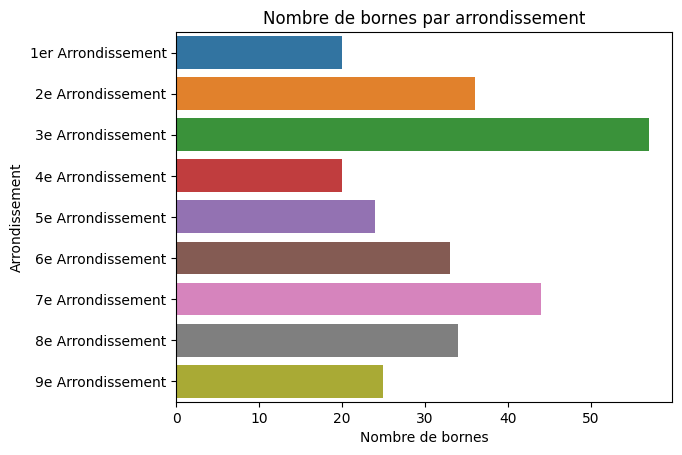

In [195]:
count_of_terminal = df_selection['arrondissement'].value_counts().reset_index().sort_values(by='index')
sns.barplot(data=count_of_terminal, x='arrondissement', y='index')
plt.xlabel('Nombre de bornes')
plt.ylabel('Arrondissement')
plt.title('Nombre de bornes par arrondissement');